In [ ]:
# Install required packages

In [1]:
!pip install pandas numpy matplotlib opencv-python-headless scikit-learn pillow
!pip install joblib

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import joblib
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from joblib import dump, load
import seaborn as sns

In [ ]:
# Define file paths

In [3]:
normal_files = os.listdir(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\NORMAL")
pneumonia_files = os.listdir(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\PNEUMONIA")

print(normal_files[:5], normal_files[-5:])
print(pneumonia_files[:5], pneumonia_files[-5:])
print('Normal:', len(normal_files), 'Pneumonia:', len(pneumonia_files))


['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg'] ['NORMAL2-IM-1406-0001.jpeg', 'NORMAL2-IM-1412-0001.jpeg', 'NORMAL2-IM-1419-0001.jpeg', 'NORMAL2-IM-1422-0001.jpeg', 'NORMAL2-IM-1423-0001.jpeg']
['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg'] ['person99_virus_183.jpeg', 'person9_bacteria_38.jpeg', 'person9_bacteria_39.jpeg', 'person9_bacteria_40.jpeg', 'person9_bacteria_41.jpeg']
Normal: 1341 Pneumonia: 3875


In [4]:
normal_labels = [0] * len(normal_files)
pneumonia_labels = [1] * len(pneumonia_files)

labels = normal_labels + pneumonia_labels
print('Total labels:', len(labels))


Total labels: 5216


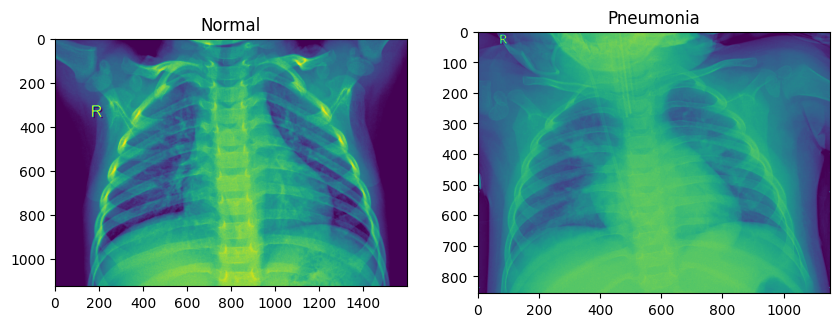

In [5]:
image_normal = mpimg.imread(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\NORMAL\IM-0125-0001.jpeg")
image_pneumonia = mpimg.imread(r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\PNEUMONIA\person9_bacteria_39.jpeg")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_normal)
plt.title('Normal')

plt.subplot(1, 2, 2)
plt.imshow(image_pneumonia)
plt.title('Pneumonia')
plt.show()


In [ ]:
# Load normal images

In [6]:
data = []
labels = []

# Load normal images
normal_path = r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\NORMAL\\"
for img_file in normal_files:
    image = Image.open(normal_path + img_file)
    image = image.resize((128, 128)).convert('RGB')
    data.append(np.array(image))
    labels.append(0)

# Load pneumonia images
pneumonia_path = r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Datasets\PNEUMONIA\\"
for img_file in pneumonia_files:
    image = Image.open(pneumonia_path + img_file)
    image = image.resize((128, 128)).convert('RGB')
    data.append(np.array(image))
    labels.append(1)

data = np.array(data) / 255.0  # Normalize pixel values
labels = np.array(labels)

print('Data shape:', data.shape)
print('Labels shape:', labels.shape)


Data shape: (5216, 128, 128, 3)
Labels shape: (5216,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print('Training data:', X_train.shape)
print('Testing data:', X_test.shape)


Training data: (4172, 128, 128, 3)
Testing data: (1044, 128, 128, 3)


In [8]:
num_states = X_train.shape[0]  
num_actions = 2  
q_table = np.zeros((num_states, num_actions))  

alpha = 0.1  
gamma = 0.9  
epsilon = 0.2  
epochs = 100  


In [ ]:
# Initialize the accuracy history and reward history lists

In [12]:
accuracy_history = []
reward_history = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    total_reward = 0 
    for i, (image, label) in enumerate(zip(X_train, y_train)):
        state = i  

        
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(num_actions) 
        else:
            action = np.argmax(q_table[state]) 

        
        reward = 1 if action == label else -1
        total_reward += reward  

        
        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[state]) - q_table[state, action]
        )
        
    
    average_reward = total_reward / len(y_train)
    reward_history.append(average_reward)
    
    
    predictions = []
    for i, image in enumerate(X_test):
        state = i  
        action = np.argmax(q_table[state])  
        predictions.append(action)

    epoch_accuracy = accuracy_score(y_test, predictions)
    accuracy_history.append(epoch_accuracy)  
    print(f"Epoch {epoch + 1} Accuracy: {epoch_accuracy:.2f}")

print("Q-learning training completed!")

Epoch 1/100
Epoch 1 Accuracy: 0.60
Epoch 2/100
Epoch 2 Accuracy: 0.60
Epoch 3/100
Epoch 3 Accuracy: 0.60
Epoch 4/100
Epoch 4 Accuracy: 0.60
Epoch 5/100
Epoch 5 Accuracy: 0.60
Epoch 6/100
Epoch 6 Accuracy: 0.60
Epoch 7/100
Epoch 7 Accuracy: 0.60
Epoch 8/100
Epoch 8 Accuracy: 0.60
Epoch 9/100
Epoch 9 Accuracy: 0.60
Epoch 10/100
Epoch 10 Accuracy: 0.60
Epoch 11/100
Epoch 11 Accuracy: 0.60
Epoch 12/100
Epoch 12 Accuracy: 0.60
Epoch 13/100
Epoch 13 Accuracy: 0.60
Epoch 14/100
Epoch 14 Accuracy: 0.60
Epoch 15/100
Epoch 15 Accuracy: 0.60
Epoch 16/100
Epoch 16 Accuracy: 0.60
Epoch 17/100
Epoch 17 Accuracy: 0.60
Epoch 18/100
Epoch 18 Accuracy: 0.60
Epoch 19/100
Epoch 19 Accuracy: 0.60
Epoch 20/100
Epoch 20 Accuracy: 0.60
Epoch 21/100
Epoch 21 Accuracy: 0.60
Epoch 22/100
Epoch 22 Accuracy: 0.60
Epoch 23/100
Epoch 23 Accuracy: 0.60
Epoch 24/100
Epoch 24 Accuracy: 0.60
Epoch 25/100
Epoch 25 Accuracy: 0.60
Epoch 26/100
Epoch 26 Accuracy: 0.60
Epoch 27/100
Epoch 27 Accuracy: 0.60
Epoch 28/100
Epoch 

In [ ]:
# Final predictions

In [13]:
predictions = []
for i, image in enumerate(X_test):
    state = i  
    action = np.argmax(q_table[state])  
    predictions.append(action)

accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy:.2f}")


print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions)
print(cm)


Test Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.24      0.25       287
           1       0.72      0.74      0.73       757

    accuracy                           0.60      1044
   macro avg       0.49      0.49      0.49      1044
weighted avg       0.59      0.60      0.60      1044

Confusion Matrix:
[[ 70 217]
 [200 557]]


In [ ]:
# Plotting the accuracy over epochs

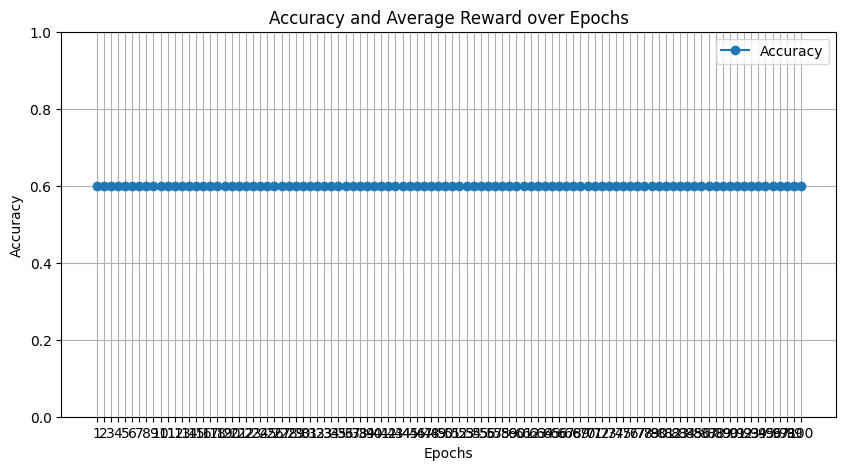

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), accuracy_history, marker='o', label='Accuracy')
plt.title('Accuracy and Average Reward over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(range(1, epochs + 1))
plt.ylim(0, 1)
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Plotting the average reward over epochs

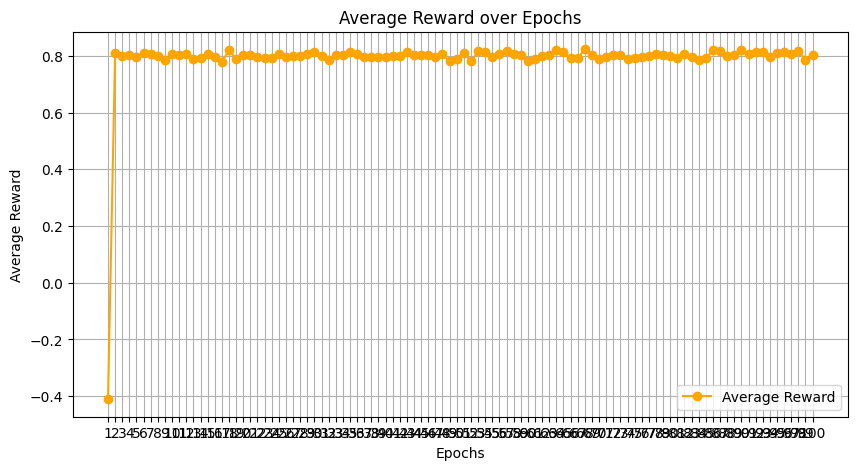

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), reward_history, marker='o', color='orange', label='Average Reward')
plt.title('Average Reward over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Average Reward')
plt.xticks(range(1, epochs + 1))
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Plotting the confusion matrix

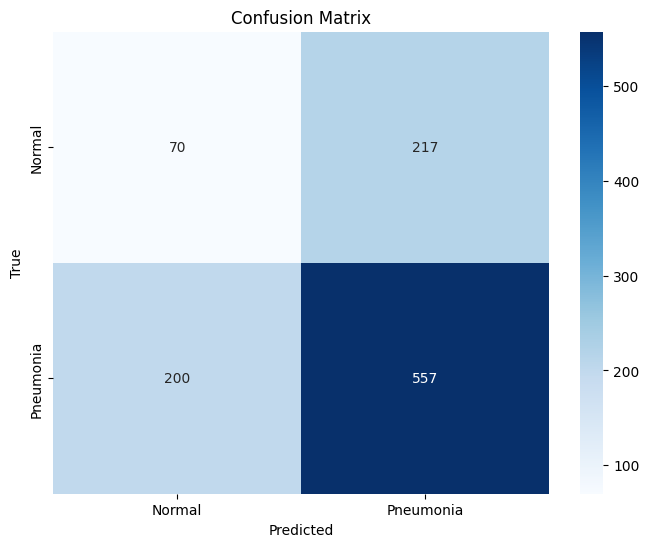

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

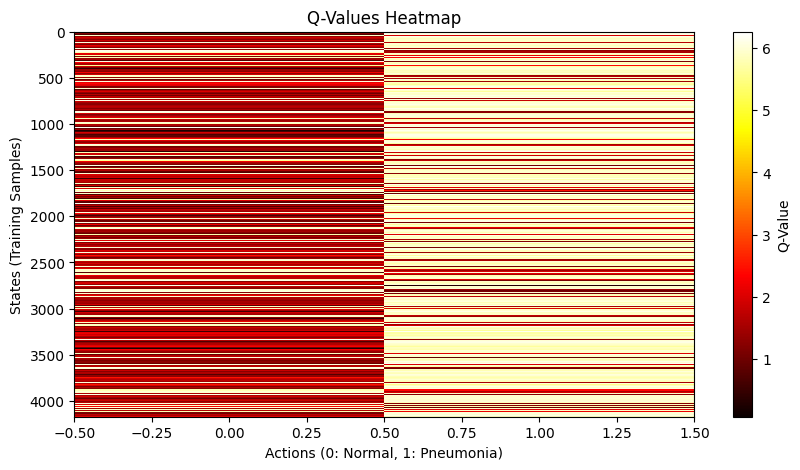

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(q_table, aspect='auto', cmap='hot', interpolation='nearest')
plt.title('Q-Values Heatmap')
plt.xlabel('Actions (0: Normal, 1: Pneumonia)')
plt.ylabel('States (Training Samples)')
plt.colorbar(label='Q-Value')
plt.show()

In [19]:
dump(q_table, 'q_learning_pneumonia_model.joblib')
print("Model saved as 'q_learning_pneumonia_model.joblib'")

Model saved as 'q_learning_pneumonia_model.joblib'


In [20]:
q_table_loaded = load('q_learning_pneumonia_model.joblib')
print("Model loaded successfully!")

Model loaded successfully!


In [21]:
# Function to predict the class of an image
def predict_image(image_path):
    try:
        # Open the image
        image = Image.open(image_path)
        image = image.resize((128, 128))  # Resize to match the input shape
        image = image.convert('RGB')  # Convert to RGB format
        image = np.array(image) / 255.0  # Normalize pixel values
        image = image.flatten().reshape(1, -1)  # Flatten and reshape for prediction

        # Make prediction using Q-table
        # Here, we assume each row in the Q-table corresponds to a state (image).
        state = 0  # Set initial state for prediction (modify as needed)
        action = np.argmax(q_table_loaded[state])  # Choose the best action

        return "Pneumonia" if action == 1 else "Normal"
    
    except FileNotFoundError:
        return f"File not found: {image_path}"
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Specify the new image path for prediction
new_image_path = r"D:\MSC\MSC Subjects\2Y02 Semester\ML\Assignment\Assignmnet_02\ML-assignment\Check_Data\0001 (1).jpeg"

# Get prediction
result = predict_image(new_image_path)
print(f"The prediction for the new image is: {result}")

The prediction for the new image is: Normal
